In [1]:
import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

/home/yuyang-pang/miniconda3/envs/koopman/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option('display.precision', 17)

In [13]:
api = wandb.Api()
# runs = api.runs("yuyangpang-carnegie-mellon-university/KoopmanOperatorWithControl9")
runs = api.runs("yuyangpang-carnegie-mellon-university/KoopmanOperatorWithControl10")

In [14]:
data = []
for i, run in enumerate(runs):
    run_data = {"run_id": run.id, 
                "name": run.name, 
                "config": run.config, 
                "summary": run.summary._json_dict,
                #"history": run.history() 
                }
    data.append(run_data)
    print(f"Run {i+1}: {run.name}")

Run 1: DoublePendulum_edim1_clossoff_seed1
Run 2: Franka_edim1_clossoff_seed1
Run 3: LogisticMap_edim1_clossoff_seed1
Run 4: Polynomial_edim1_clossoff_seed1
Run 5: DoublePendulum_edim1_closson_seed1
Run 6: DoublePendulum_edim4_clossoff_seed1
Run 7: Franka_edim1_closson_seed1
Run 8: LogisticMap_edim1_closson_seed1
Run 9: DoublePendulum_edim4_closson_seed1
Run 10: Polynomial_edim1_closson_seed1
Run 11: DoublePendulum_edim16_clossoff_seed1
Run 12: LogisticMap_edim4_clossoff_seed1
Run 13: Franka_edim4_clossoff_seed1
Run 14: DoublePendulum_edim16_closson_seed1
Run 15: LogisticMap_edim4_closson_seed1
Run 16: Polynomial_edim4_clossoff_seed1
Run 17: Franka_edim4_closson_seed1
Run 18: DoublePendulum_edim64_clossoff_seed1
Run 19: LogisticMap_edim16_clossoff_seed1
Run 20: Franka_edim16_clossoff_seed1
Run 21: DoublePendulum_edim64_closson_seed1
Run 22: Polynomial_edim4_closson_seed1
Run 23: DoublePendulum_edim256_clossoff_seed1
Run 24: LogisticMap_edim16_closson_seed1
Run 25: Franka_edim16_closson

In [15]:
df_rows = []
for i in range(len(data)):
    uid = data[i]['run_id']
    env = data[i]['config']['env_name']
    encode_dim = data[i]['config']['encode_dim']
    cov_loss = data[i]['config']['c_loss']
    random_seed = data[i]['config']['seed']
    best_loss = data[i]['summary']['Eval/best_loss']

    try:
        convergence_loss = data[i]['summary']['convergence_loss']
    except KeyError:
        continue

    df_rows.append({'uid': uid, 'env': env, 'encode_dim': encode_dim, 'cov_loss': cov_loss,
                    'random_seed': random_seed, 'best_loss': best_loss, 'convergence_loss': convergence_loss})
    
    print(f"Run {i+1}: {env}")

Run 1: DoublePendulum
Run 2: Franka
Run 3: LogisticMap
Run 4: Polynomial
Run 5: DoublePendulum
Run 6: DoublePendulum
Run 7: Franka
Run 8: LogisticMap
Run 9: DoublePendulum
Run 10: Polynomial
Run 11: DoublePendulum
Run 12: LogisticMap
Run 13: Franka
Run 14: DoublePendulum
Run 15: LogisticMap
Run 16: Polynomial
Run 17: Franka
Run 18: DoublePendulum
Run 19: LogisticMap
Run 20: Franka
Run 21: DoublePendulum
Run 22: Polynomial
Run 23: DoublePendulum
Run 24: LogisticMap
Run 25: Franka
Run 26: DoublePendulum
Run 27: LogisticMap
Run 28: Polynomial
Run 29: Franka
Run 30: DoublePendulum
Run 31: LogisticMap
Run 32: Franka
Run 33: Polynomial
Run 34: LogisticMap
Run 35: DoublePendulum
Run 36: Franka
Run 37: Polynomial
Run 38: LogisticMap
Run 39: DoublePendulum
Run 40: LogisticMap
Run 41: Franka
Run 42: Polynomial
Run 43: LogisticMap
Run 44: Polynomial
Run 45: Franka
Run 46: DoublePendulum
Run 47: LogisticMap
Run 48: Polynomial
Run 49: LogisticMap
Run 50: Franka
Run 51: DoublePendulum
Run 52: Polyno

In [16]:
df = pd.DataFrame(df_rows)
df

,uid,env,encode_dim,cov_loss,random_seed,best_loss,convergence_loss
0,kjoedmjd,DoublePendulum,1,0,1,0.00053356764410486,0.00054061557733914
1,pzxvowxw,Franka,1,0,1,0.00001036606510833,0.00001037647853439
2,xqhjhqv2,LogisticMap,1,0,1,0.00210262632795822,0.00210355448238559
3,16pr29i6,Polynomial,1,0,1,0.00345914614025553,0.00346192877155693
4,39otrje9,DoublePendulum,1,1,1,0.00040144602362971,0.00040607894188425
...,...,...,...,...,...,...,...
75,rlnptk1c,DampingPendulum,512,1,1,0.00000430246643990,0.00000486281566191
76,y4sa4r8o,DampingPendulum,1024,0,1,0.00000431458468829,0.00000616442625469
77,xfocvmzt,DampingPendulum,1024,1,1,0.00000431532813090,0.00000482317581265
78,x1euptf6,DampingPendulum,2048,0,1,2.19096284784310580,373.69801054111309213


In [26]:
# plot encode_dim vs convergence_loss for Franka env, use log scale for loss, bar plot, each encode_dim has 2 bars side by side for c_loss on and off
def plot_convergence_loss(df, env):
    df_env = df[df['env'] == env]
    grouped = df_env.groupby(['encode_dim', 'cov_loss']).mean().reset_index()
    grouped = grouped[['encode_dim', 'cov_loss', 'convergence_loss']]
    grouped['cov_loss'] = grouped['cov_loss'].map({0: 'Off', 1: 'On'})

    fig, ax = plt.subplots(figsize=(10, 6))
    palette = sns.color_palette("Set2")

    sns.barplot(x='encode_dim', y='convergence_loss', hue='cov_loss', data=grouped, ax=ax, 
                palette=palette, edgecolor="black")

    # if env != "DampingPendulum":
    ax.set_yscale('log')

    ax.grid(True, which="both", linestyle="--", linewidth=0.5)

    ax.set_xlabel("Encode Dimension", fontsize=14)

    # if env == "DampingPendulum":
    #     ax.set_ylabel("Convergence Loss", fontsize=14)
    # else:
    ax.set_ylabel("Convergence Loss (Log Scale)", fontsize=14)
    plt.title("Encode Dim vs Convergence Loss for " + env, fontsize=16, fontweight="bold")

    ax.legend(title="Covariance Loss", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

/tmp/ipykernel_1546439/3953154615.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='encode_dim', y='convergence_loss', hue='cov_loss', data=grouped, ax=ax,


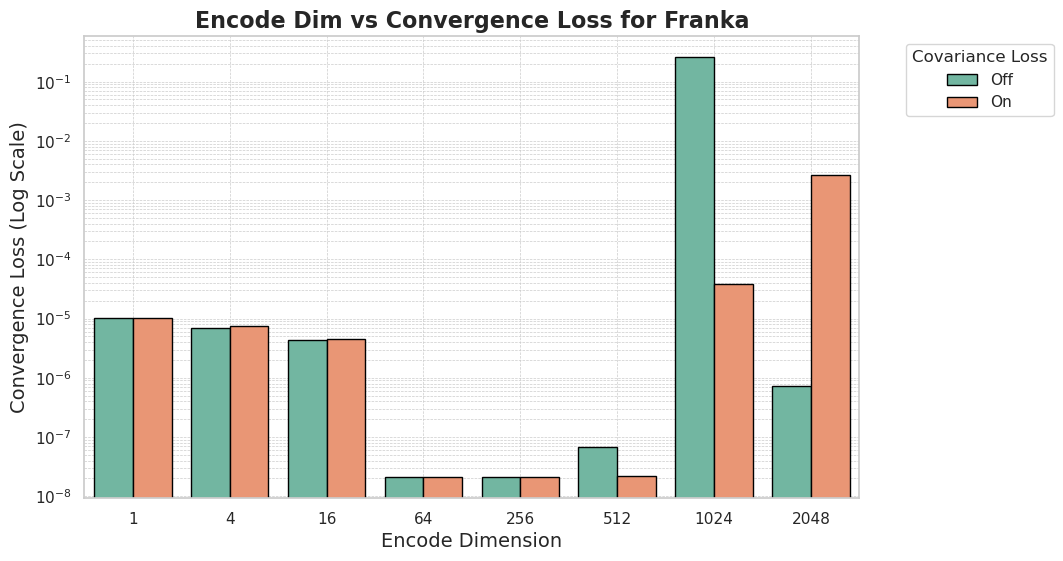

In [27]:
plot_convergence_loss(df, 'Franka')

/tmp/ipykernel_1546439/3953154615.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='encode_dim', y='convergence_loss', hue='cov_loss', data=grouped, ax=ax,


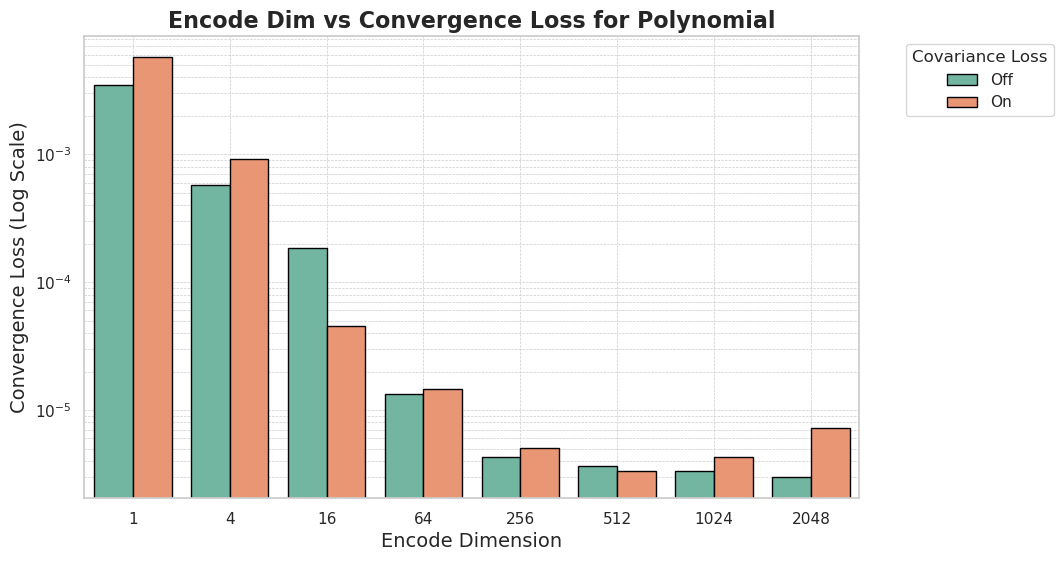

In [28]:
plot_convergence_loss(df, 'Polynomial')

/tmp/ipykernel_1546439/3953154615.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='encode_dim', y='convergence_loss', hue='cov_loss', data=grouped, ax=ax,


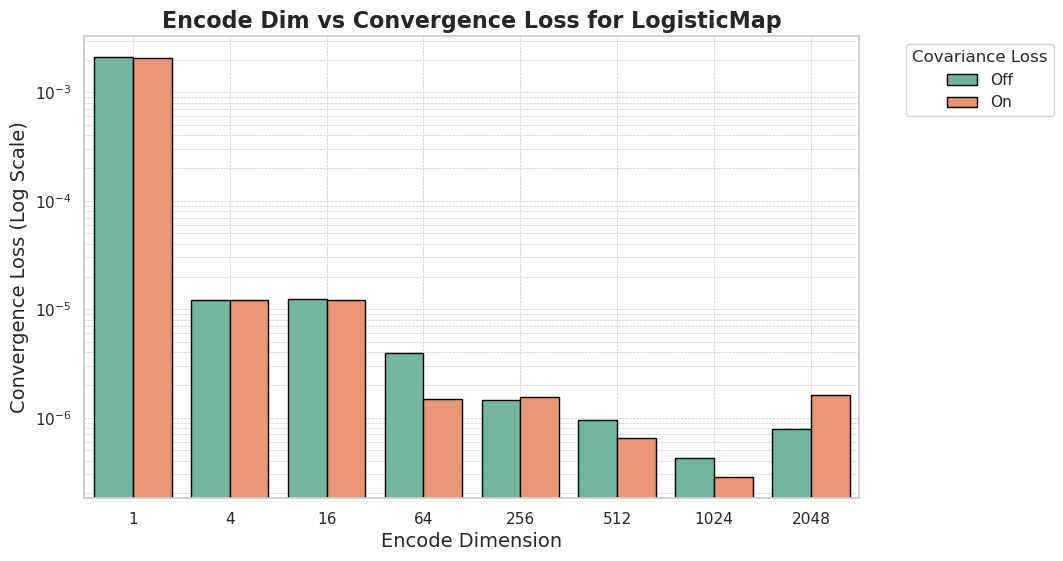

In [29]:
plot_convergence_loss(df, 'LogisticMap')

/tmp/ipykernel_1546439/3953154615.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='encode_dim', y='convergence_loss', hue='cov_loss', data=grouped, ax=ax,


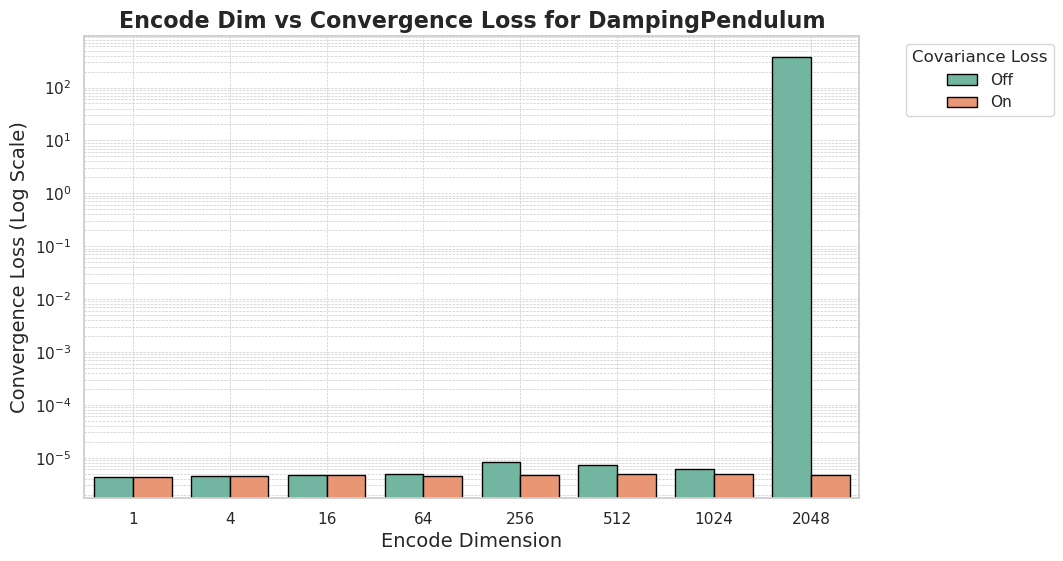

In [30]:
plot_convergence_loss(df, 'DampingPendulum')

/tmp/ipykernel_1546439/1514447799.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='encode_dim', y='convergence_loss', hue='cov_loss', data=grouped, ax=ax,


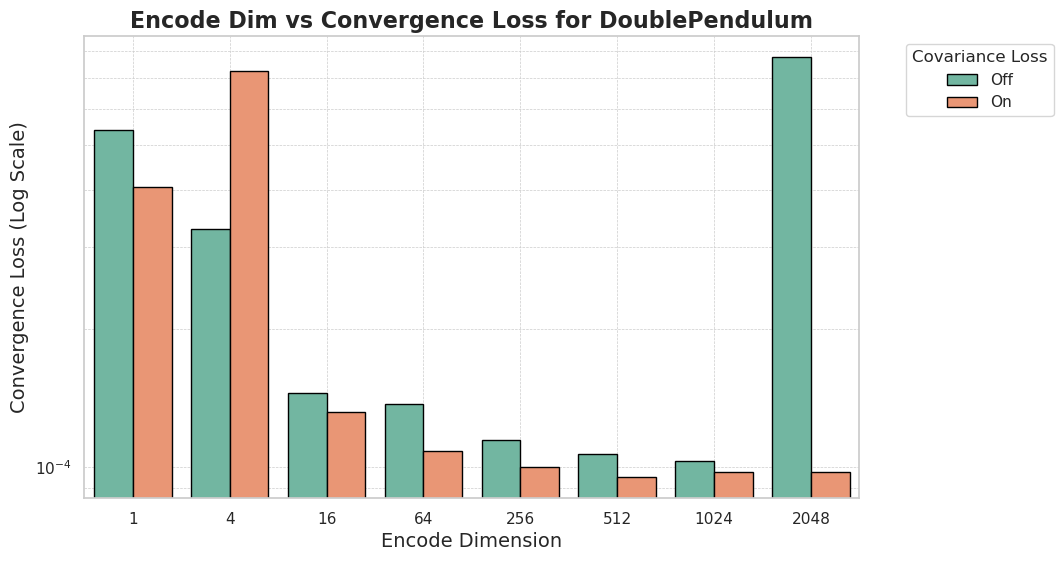

In [22]:
plot_convergence_loss(df, "DoublePendulum")

In [78]:
runs = api.runs("yuyangpang-carnegie-mellon-university/DeepKoopmanAblation")

data = []
for i, run in enumerate(runs):
    run_data = {"run_id": run.id, 
                "name": run.name, 
                "config": run.config, 
                "summary": run.summary._json_dict,
                #"history": run.history() 
                }
    data.append(run_data)
    print(f"Run {i+1}: {run.name}")

Run 1: Franka_arch_deep_res_True_gauss_True_adaptive_cov_True_edim136_closson_seed1
Run 2: Franka_arch_unfolding_res_True_gauss_True_adaptive_cov_False_edim136_closson_seed1
Run 3: Franka_arch_unfolding_res_False_gauss_True_adaptive_cov_True_edim136_closson_seed1
Run 4: Franka_arch_unfolding_res_True_gauss_True_adaptive_cov_True_edim136_clossoff_seed1
Run 5: Franka_arch_unfolding_res_True_gauss_True_adaptive_cov_True_edim136_closson_seed1


In [80]:
df_rows = []
for i in range(len(data)):
    uid = data[i]['run_id']
    env = data[i]['config']['env_name']
    encode_dim = data[i]['config']['encode_dim']
    cov_loss = data[i]['config']['c_loss']
    random_seed = data[i]['config']['seed']
    best_loss = data[i]['summary']['Eval/best_loss']
    use_residual = data[i]['config']['use_residual']
    architecture = data[i]['config']['architecture']
    adaptive_cov = data[i]['config']['adaptive_cov']

    try:
        convergence_loss = data[i]['summary']['convergence_loss']
    except KeyError:
        continue

    df_rows.append({'uid': uid, 'env': env, 'encode_dim': encode_dim, 'cov_loss': cov_loss,
                    'random_seed': random_seed, 'best_loss': best_loss, 'convergence_loss': convergence_loss,
                    'residual_connection': use_residual, 'architecture': architecture, 'adaptive_cov_loss': adaptive_cov})
    
    print(f"Run {i+1}: {env}")

Run 1: Franka
Run 2: Franka
Run 3: Franka
Run 4: Franka
Run 5: Franka


In [99]:
df = pd.DataFrame(df_rows)
df['architecture'] = df['architecture'].map({'deep': False, 'unfolding': True})
df['cov_loss'] = df['cov_loss'].map({0: False, 1: True})
df

,uid,env,encode_dim,cov_loss,random_seed,best_loss,convergence_loss,residual_connection,architecture,adaptive_cov_loss
0,qv7s42ki,Franka,136,True,1,0.00000000486579707,0.00000000551622316,True,False,True
1,nvahtoep,Franka,136,True,1,0.00000002352731142,0.00000002450494306,True,True,False
2,qdcx2gcv,Franka,136,True,1,0.00000002386699848,0.00000002450281905,False,True,True
3,srjs26rb,Franka,136,False,1,0.00000000417496247,0.00000000460778200,True,True,True
4,4nmnstvn,Franka,136,True,1,0.00000000388879914,0.00000000426876647,True,True,True


In [130]:
def plot_convergence_loss_for_feature(df, feature_name):

    df_franka = df[df['env'] == 'Franka'].copy()

    target_run_uid = df_franka[df_franka[feature_name] == False].iloc[0]['uid']
    filtered_df = df_franka[(df_franka['uid'] == target_run_uid) | (df_franka['uid'] == "4nmnstvn")]

    grouped = filtered_df.groupby(feature_name, as_index=False).mean(numeric_only=True)

    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    palette = sns.color_palette("Set2")

    # Bar plot of convergence_loss vs. the design feature
    sns.barplot(x=feature_name, y='convergence_loss', data=grouped,
                palette=palette, edgecolor="black", ax=ax)

    # Add a grid
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)

    if feature_name == "architecture":
        ax.set_xticklabels(["Full Width", "Unfolding"])
        xlabel_name = "Model Architecture"
    elif feature_name == "adaptive_cov_loss":
        ax.set_xticklabels(["Fixed Factor", "Adaptive Factor"])
        xlabel_name = "Adaptive Covariance Loss"
    elif feature_name == "residual_connection":
        ax.set_xticklabels(["No Residual", "Residual"])
        xlabel_name = "Residual Connection"
    elif feature_name == "cov_loss":
        ax.set_xticklabels(["No Covariance Loss", "Covariance Loss"])
        xlabel_name = "Covariance Loss"

    # Label axes
    ax.set_xlabel(xlabel_name, fontsize=14)
    ax.set_ylabel("Convergence Loss", fontsize=14)

    # Title
    plt.title(f"{xlabel_name} Ablation Study (Franka Env)",
              fontsize=16, fontweight="bold")

    plt.tight_layout()
    plt.show()


/tmp/ipykernel_467971/2778389600.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_name, y='convergence_loss', data=grouped,
/tmp/ipykernel_467971/2778389600.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x=feature_name, y='convergence_loss', data=grouped,
/tmp/ipykernel_467971/2778389600.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No Residual", "Residual"])


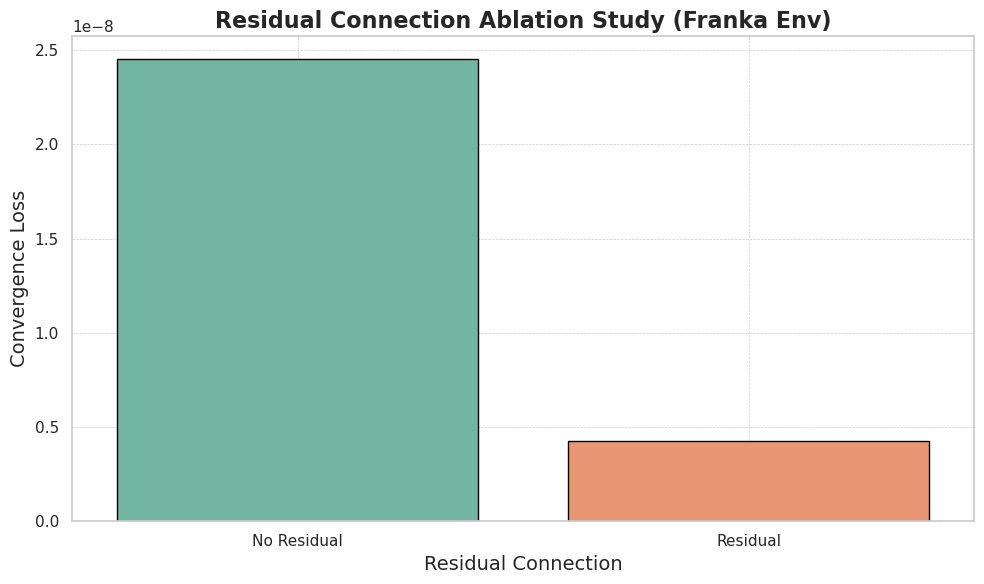

In [131]:
plot_convergence_loss_for_feature(df, "residual_connection")

/tmp/ipykernel_467971/2778389600.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_name, y='convergence_loss', data=grouped,
/tmp/ipykernel_467971/2778389600.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x=feature_name, y='convergence_loss', data=grouped,
/tmp/ipykernel_467971/2778389600.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Full Width", "Unfolding"])


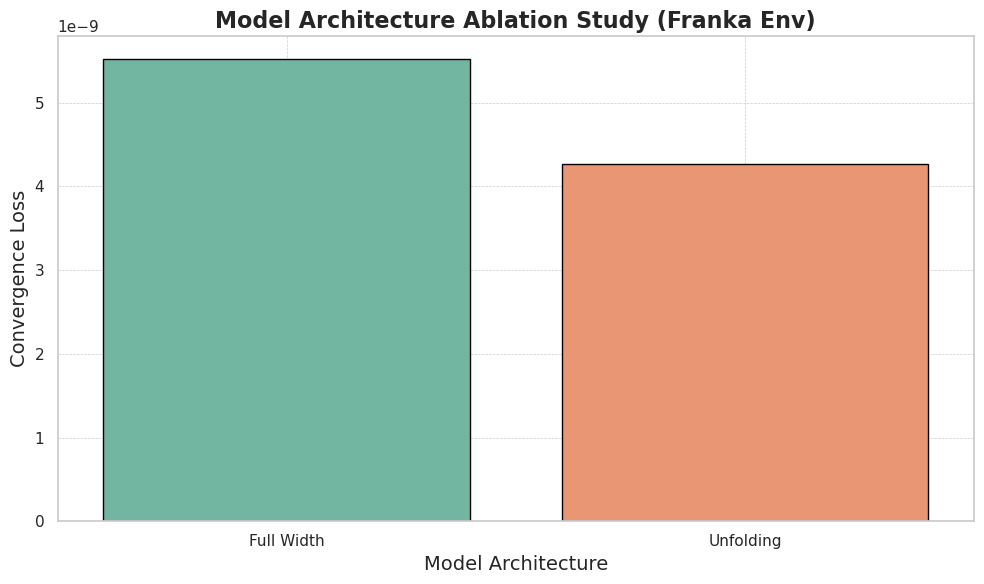

In [132]:
plot_convergence_loss_for_feature(df, "architecture")

/tmp/ipykernel_467971/2778389600.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_name, y='convergence_loss', data=grouped,
/tmp/ipykernel_467971/2778389600.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x=feature_name, y='convergence_loss', data=grouped,
/tmp/ipykernel_467971/2778389600.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Fixed Factor", "Adaptive Factor"])


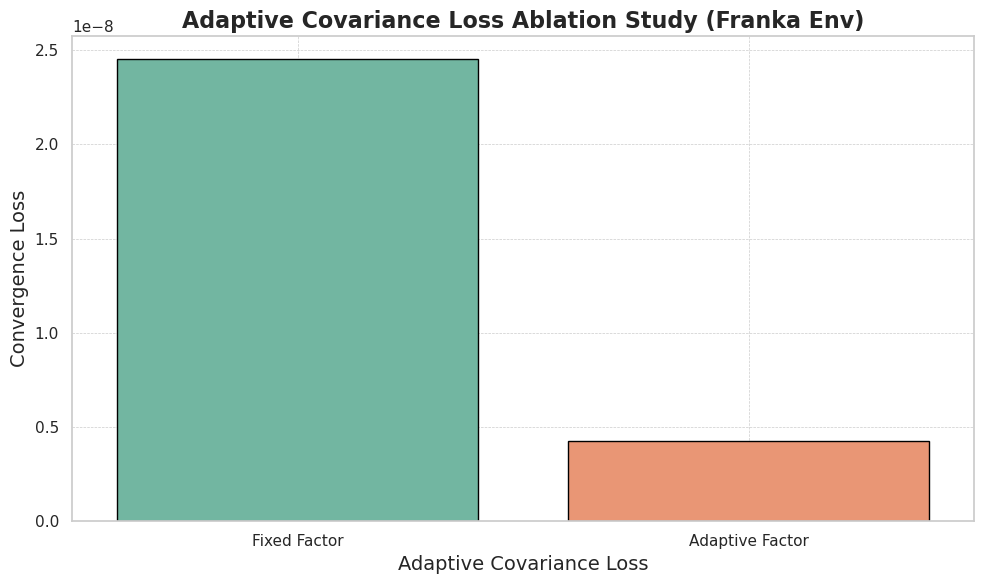

In [133]:
plot_convergence_loss_for_feature(df, "adaptive_cov_loss")

/tmp/ipykernel_467971/2778389600.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_name, y='convergence_loss', data=grouped,
/tmp/ipykernel_467971/2778389600.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x=feature_name, y='convergence_loss', data=grouped,
/tmp/ipykernel_467971/2778389600.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No Covariance Loss", "Covariance Loss"])


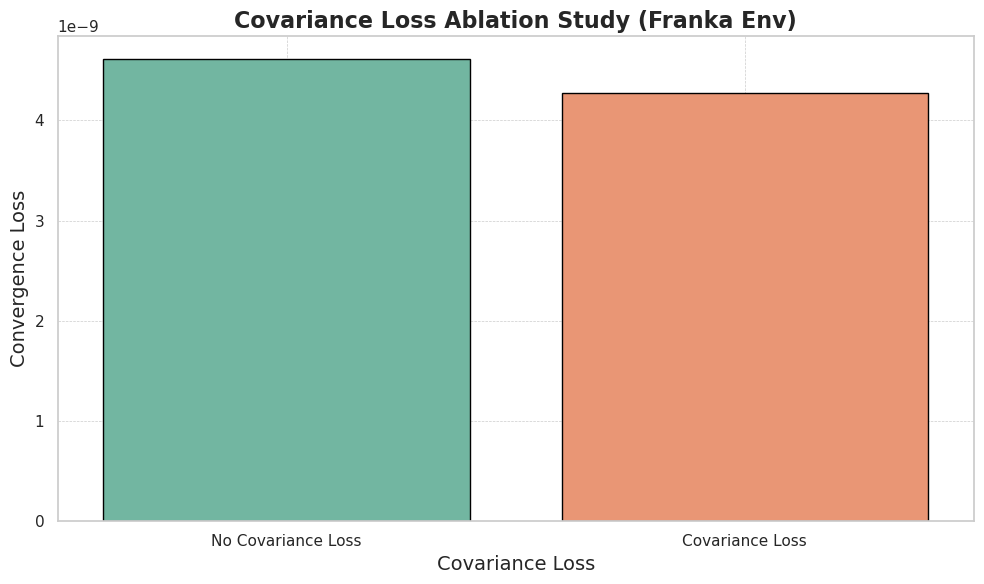

In [134]:
plot_convergence_loss_for_feature(df, "cov_loss")

In [4]:
runs = api.runs("yuyangpang-carnegie-mellon-university/DeepKoopmanAblation2")

In [5]:
data = []
for i, run in enumerate(runs):
    run_data = {"run_id": run.id, 
                "name": run.name, 
                "config": run.config, 
                "summary": run.summary._json_dict,
                #"history": run.history() 
                }
    data.append(run_data)
    print(f"Run {i+1}: {run.name}")

Run 1: Franka_arch_deep_res_True_gauss_True_adaptive_cov_True_edim17_closson_seed1
Run 2: Franka_arch_deep_res_True_gauss_True_adaptive_cov_True_edim34_closson_seed1
Run 3: Franka_arch_deep_res_True_gauss_True_adaptive_cov_True_edim68_closson_seed1
Run 4: Franka_arch_deep_res_True_gauss_True_adaptive_cov_True_edim136_closson_seed1


In [6]:
df_rows = []
for i in range(len(data)):
    uid = data[i]['run_id']
    env = data[i]['config']['env_name']
    encode_dim = data[i]['config']['encode_dim']
    cov_loss = data[i]['config']['c_loss']
    random_seed = data[i]['config']['seed']
    best_loss = data[i]['summary']['Eval/best_loss']

    try:
        convergence_loss = data[i]['summary']['convergence_loss']
    except KeyError:
        continue

    df_rows.append({'uid': uid, 'env': env, 'encode_dim': encode_dim, 'cov_loss': cov_loss,
                    'random_seed': random_seed, 'best_loss': best_loss, 'convergence_loss': convergence_loss})
    
    print(f"Run {i+1}: {env}")

Run 1: Franka
Run 2: Franka
Run 3: Franka
Run 4: Franka


In [7]:
df = pd.DataFrame(df_rows)
df

,uid,env,encode_dim,cov_loss,random_seed,best_loss,convergence_loss
0,ygk9a671,Franka,17,1,1,0.00000021838201119,0.00000021981932574
1,dzkci4i3,Franka,34,1,1,0.00000001462237461,0.00000001555191728
2,emfi80ci,Franka,68,1,1,0.00000000893607991,0.00000000934256377
3,zlxwuqgq,Franka,136,1,1,0.00000000486579707,0.00000000551622316


In [8]:
def plot_convergence_loss(df, env):
    df_env = df[df['env'] == env]
    grouped = df_env.groupby(['encode_dim']).mean().reset_index()
    grouped = grouped[['encode_dim','convergence_loss']]

    fig, ax = plt.subplots(figsize=(10, 6))
    palette = sns.color_palette("Set2")

    sns.barplot(x='encode_dim', y='convergence_loss', data=grouped, ax=ax, 
                palette=palette, edgecolor="black")

    if env != "DampingPendulum":
        ax.set_yscale('log')

    ax.grid(True, which="both", linestyle="--", linewidth=0.5)

    ax.set_xlabel("Encode Dimension", fontsize=14)

    if env == "DampingPendulum":
        ax.set_ylabel("Convergence Loss", fontsize=14)
    else:
        ax.set_ylabel("Convergence Loss (Log Scale)", fontsize=14)
    plt.title("Encode Dim vs Convergence Loss for " + env, fontsize=16, fontweight="bold")

    plt.show()

/tmp/ipykernel_985818/2827739347.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='encode_dim', y='convergence_loss', data=grouped, ax=ax,
/tmp/ipykernel_985818/2827739347.py:9: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x='encode_dim', y='convergence_loss', data=grouped, ax=ax,


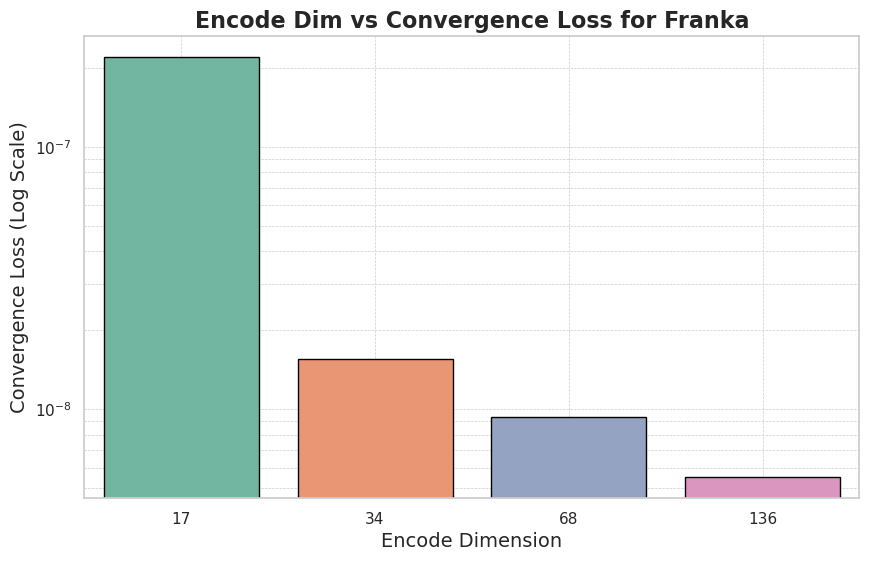

In [9]:
plot_convergence_loss(df, 'Franka')